In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

 

# **IRIS Description**
 
Iris is a flowering plant genus of 310 accepted species with showy flowers. As well as being the scientific name, iris is also widely used as a common name for all Iris species, as well as some belonging to other closely related genera. A common name for some species is flags, while the plants of the subgenus Scorpiris are widely known as junos, particularly in horticulture. It is a popular garden flower.

In [53]:
from IPython.display import Image 
!ls ../input/images

iris1.jpg  iris2.jpg


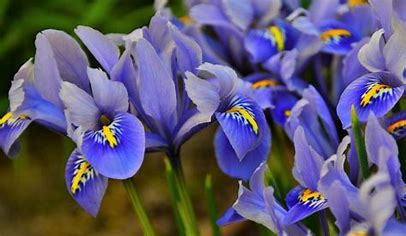

In [54]:
Image("/kaggle/input/images/iris1.jpg")

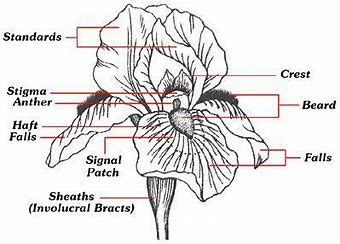

In [55]:
Image("/kaggle/input/images/iris2.jpg")

# Importing Dataset

In [58]:
#Importing the Dataset
data = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")

In [59]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [65]:
data.shape

(150, 5)

In [66]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [67]:
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Importing Required libraries

In [70]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

# DATA VISUALIZATION

Text(0, 0.5, 'Length/Width')

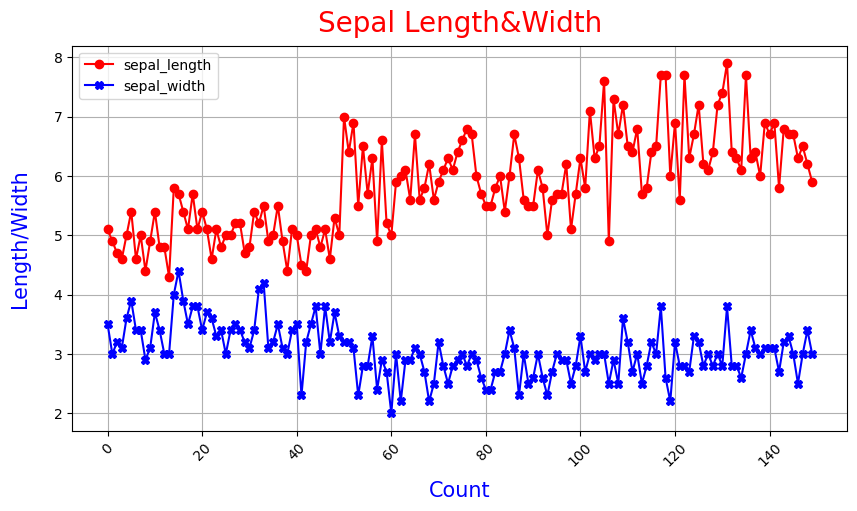

In [71]:
# df['sepal_length'].plot(kind='hist')
data['sepal_length'].plot(kind='line',legend=True,marker='o',color='r',figsize=(10,5),grid=True,rot=45)
data['sepal_width'].plot(kind='line',legend=True,marker="X",color='b',figsize=(10,5),grid=True,rot=45)
plt.title('Sepal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'r','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

Text(0, 0.5, 'Length/Width')

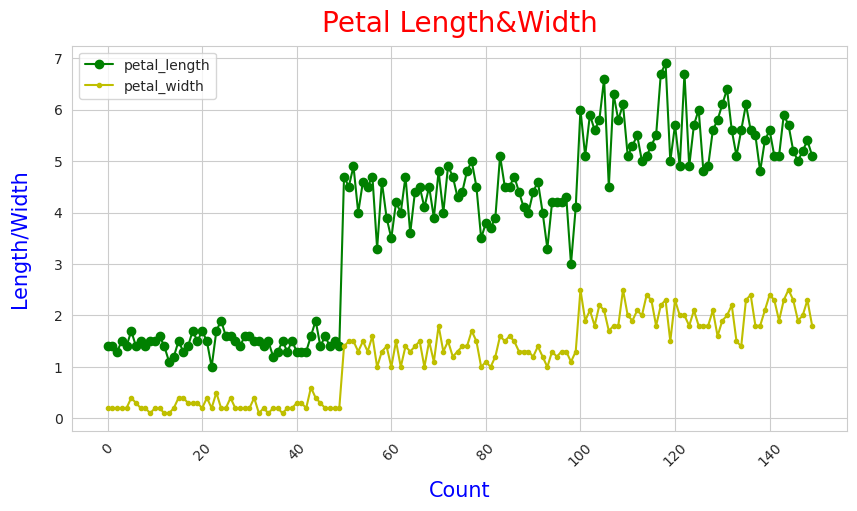

In [83]:
data['petal_length'].plot(kind='line',legend=True,marker='o',color='g',figsize=(10,5),grid=True,rot=45)
data['petal_width'].plot(kind='line',legend=True,marker=".",color='y',figsize=(10,5),grid=True,rot=45)
plt.title('Petal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'r','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

Text(0, 0.5, 'Length/Width')

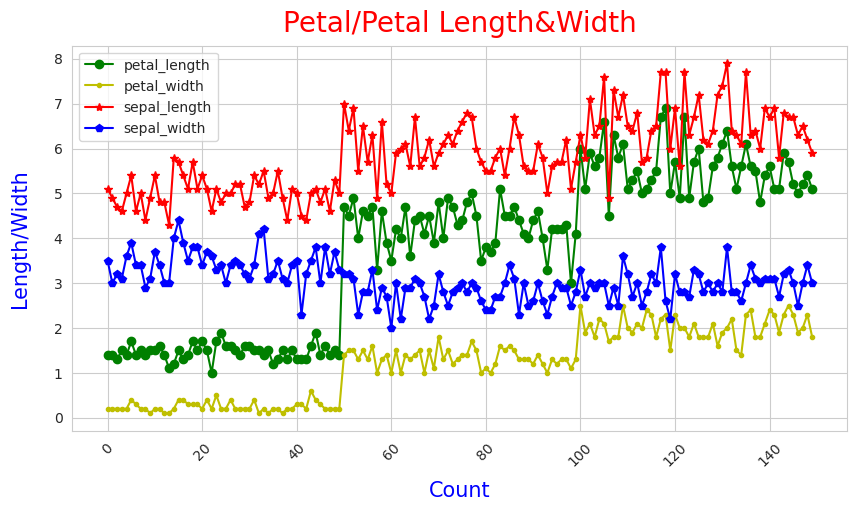

In [84]:
data['petal_length'].plot(kind='line',legend=True,marker='o',color='g',figsize=(10,5),grid=True,rot=45)
data['petal_width'].plot(kind='line',legend=True,marker=".",color='y',figsize=(10,5),grid=True,rot=45)
data['sepal_length'].plot(kind='line',legend=True,marker="*",color='r',figsize=(10,5),grid=True,rot=45)
data['sepal_width'].plot(kind='line',legend=True,marker="p",color='b',figsize=(10,5),grid=True,rot=45)
plt.title('Petal/Petal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'r','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

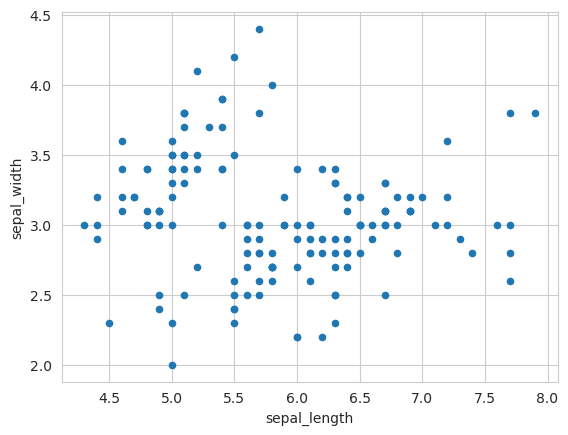

In [87]:
data.plot(kind ='scatter', x='sepal_length', y='sepal_width')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


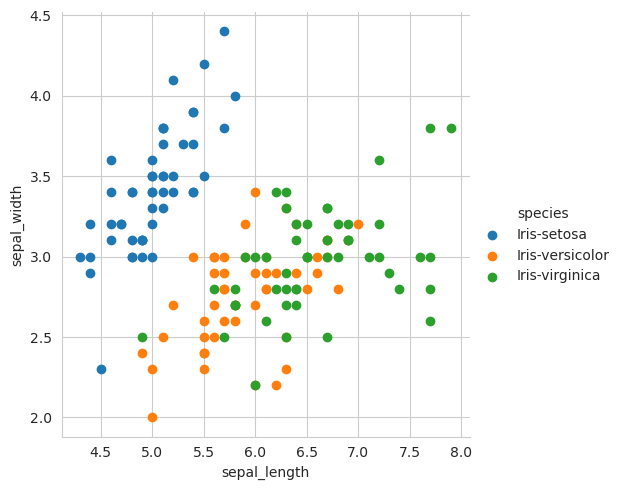

In [89]:
sns.set_style('whitegrid');
sns.FacetGrid(data, hue='species',height=5)\
   .map(plt.scatter,'sepal_length','sepal_width')\
   .add_legend()
plt.show();

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


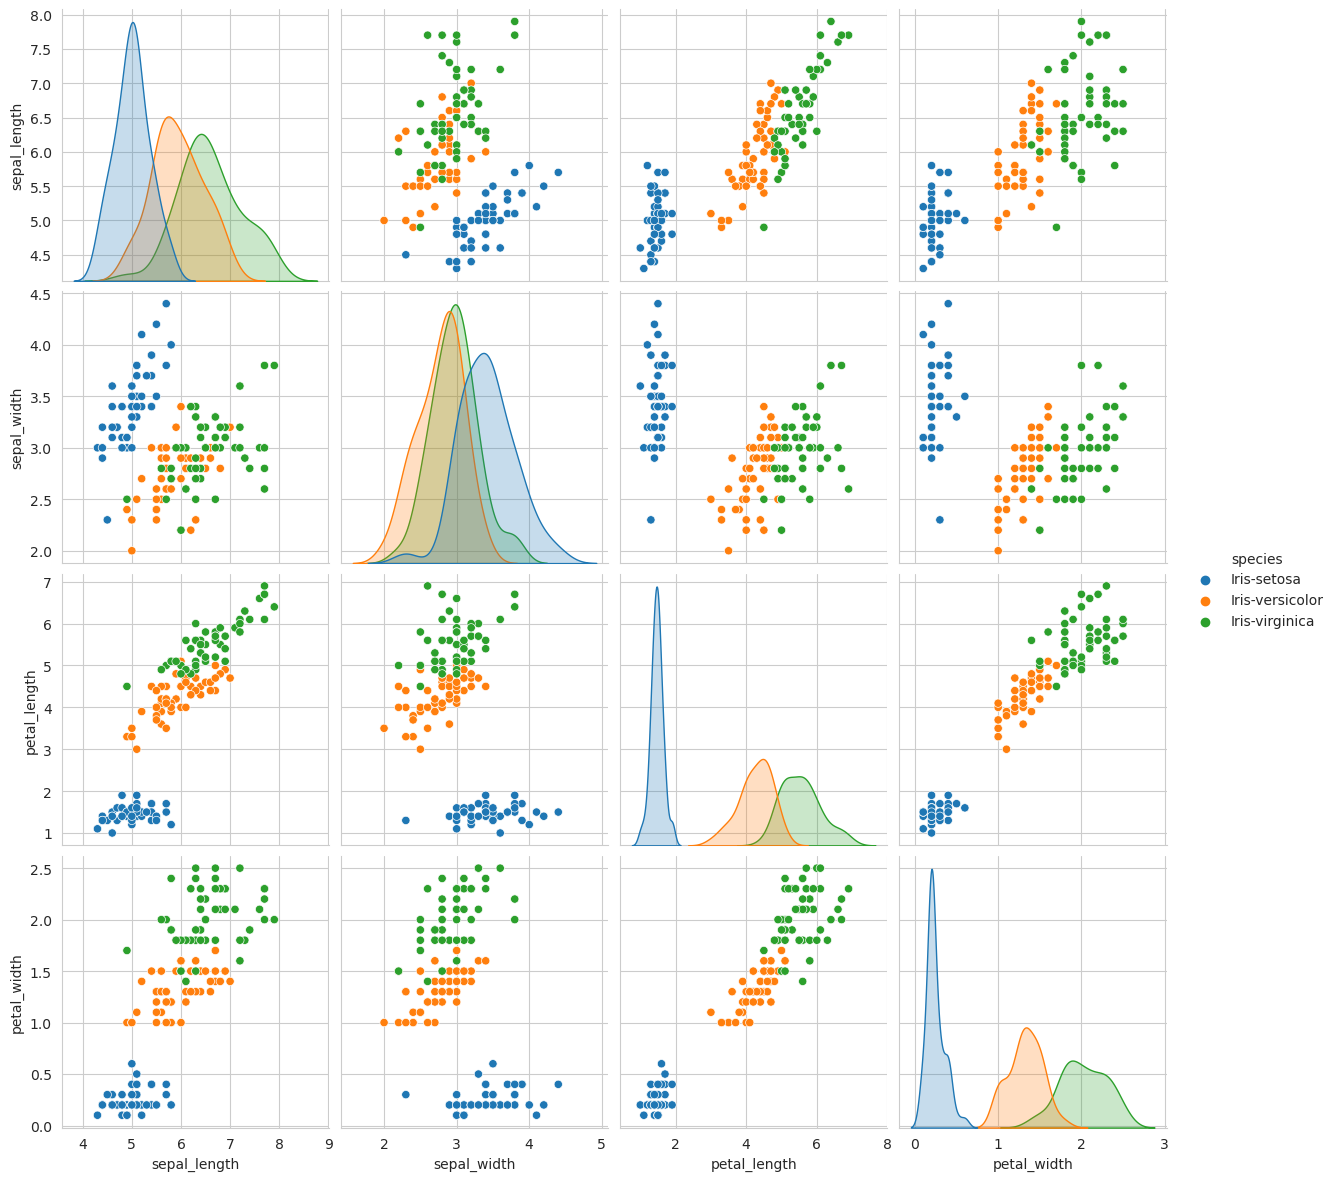

In [91]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(data,hue='species',height=3);
plt.show()

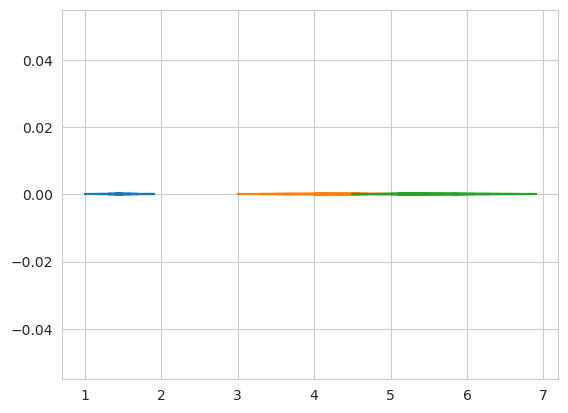

In [94]:
iris_setosa = data.loc[data['species'] == 'Iris-setosa']
iris_virginica = data.loc[data['species'] == 'Iris-virginica']
iris_versicolor = data.loc[data['species'] == 'Iris-versicolor']

#print(iris_sentosa['petal.length'])

plt.plot(iris_setosa['petal_length'],np.zeros_like(iris_setosa['petal_length']))
plt.plot(iris_versicolor['petal_length'],np.zeros_like(iris_versicolor['petal_length']))
plt.plot(iris_virginica['petal_length'],np.zeros_like(iris_virginica['petal_length']))

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packa

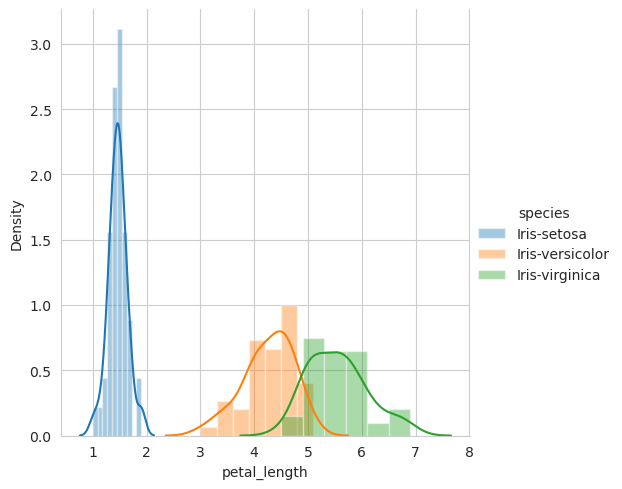

In [96]:
sns.FacetGrid(data, hue='species',height=5)\
   .map(sns.distplot, 'petal_length')\
   .add_legend()

plt.show()

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


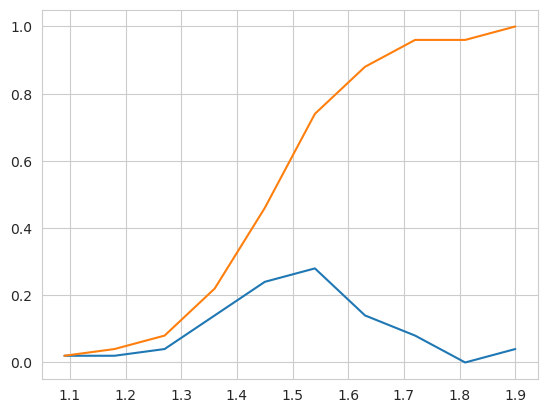

In [97]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'],bins=10,
                                 density = True)

pdf = counts/(sum(counts)) # compute pdf
print(pdf)
print(bin_edges)

#compute CDF

cdf = np.cumsum(pdf) # numpy fun to calculate cummulative sum   
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


plt.show()

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]
[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


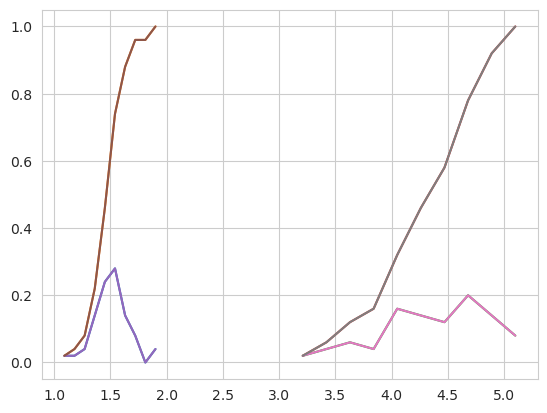

In [98]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'],bins=10,
                                 density = True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


# versicolor

counts, bin_edges = np.histogram(iris_versicolor['petal_length'],bins=10,
                                 density = True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(iris_setosa['petal_length'],bins=10,
                                 density = True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


# versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'],bins=10,
                                 density = True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

**Distribution Plot**

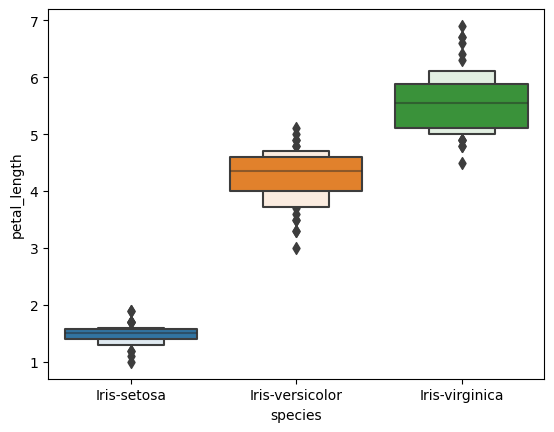

In [76]:
sns.boxenplot(x = 'species', y = 'petal_length', data = data )
plt.show()

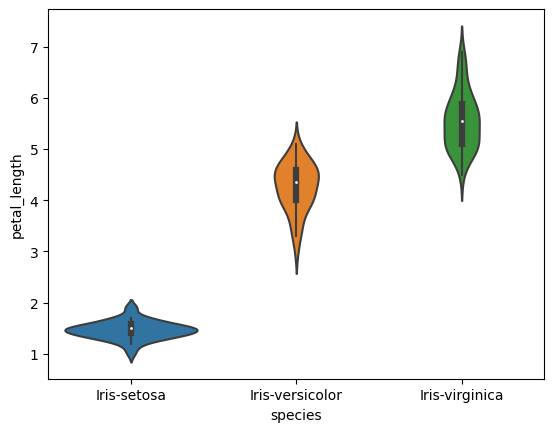

In [77]:
sns.violinplot(x = 'species', y = 'petal_length', data = data)
plt.show()

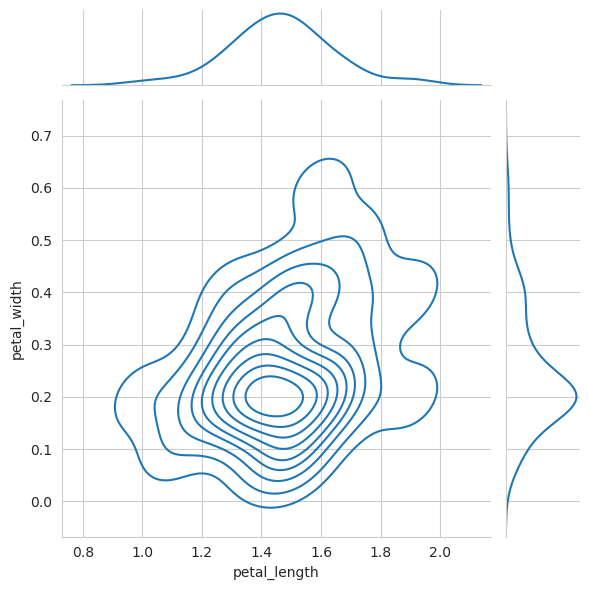

In [105]:
sns.jointplot(x='petal_length',y='petal_width', data = iris_setosa, kind = 'kde')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


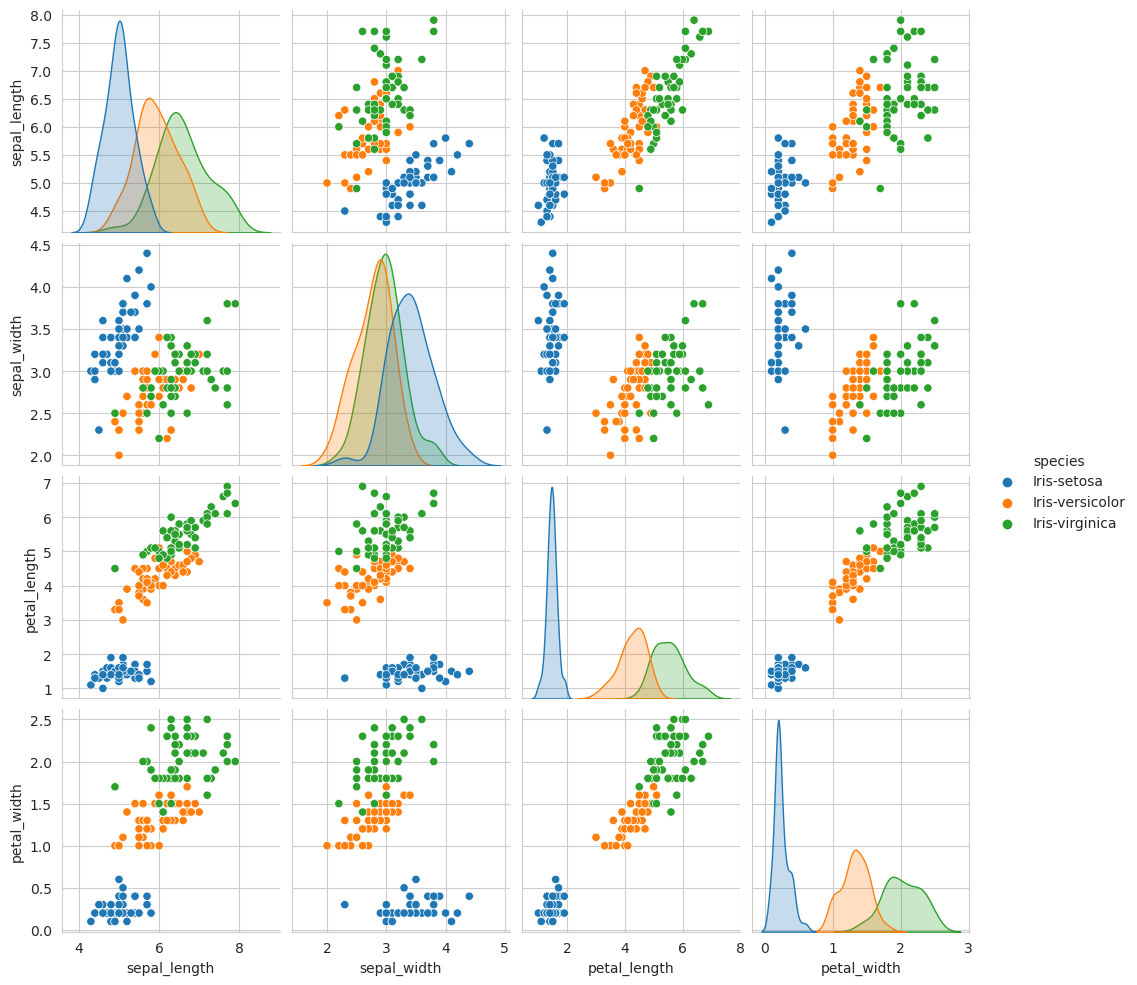

In [79]:
sns.set_style('whitegrid')
sns.pairplot(data, hue = 'species')
plt.show()

In [99]:
print('Means:')
print('setosa :',np.mean(iris_setosa['petal_length']))
print('Setosa Mean with an outlier :',np.mean(np.append(iris_setosa['petal_length'],50))) #mean with an outlier
print('Verginica :',np.mean(iris_virginica['petal_length']))
print('Versicolor :',np.mean(iris_versicolor['petal_length']))

print("\nStd-dev:")
print(np.std(iris_setosa['petal_length']))
print(np.std(iris_virginica['petal_length']))
print(np.std(iris_versicolor['petal_length']))

Means:
setosa : 1.464
Setosa Mean with an outlier : 2.4156862745098038
Verginica : 5.5520000000000005
Versicolor : 4.26

Std-dev:
0.17176728442867112
0.546347874526844
0.4651881339845203


In [100]:
print("\n Medians:")
print(np.median(iris_setosa['petal_length']))
print(np.median(np.append(iris_setosa['petal_length'],50))) # median with an outlier
print(np.median(iris_virginica['petal_length']))
print(np.median(iris_versicolor['petal_length']))


 Medians:
1.5
1.5
5.55
4.35


In [101]:
print("\n Quantiles:")
print(np.percentile(iris_setosa['petal_length'],np.arange(0,100,25)))
print(np.percentile(iris_virginica['petal_length'],np.arange(0,100,25)))
print(np.percentile(iris_versicolor['petal_length'],np.arange(0,100,25)))


 Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]


In [104]:
print("\n 90th Percentiles:")
print(np.percentile(iris_setosa['petal_length'],90))
print(np.percentile(iris_virginica['petal_length'],90))
print(np.percentile(iris_versicolor['petal_length'],90))


 90th Percentiles:
1.7
6.31
4.8


In [106]:
# N(0,1)

std_normal = np.random.normal(loc = 0, scale = 1, size = 1000) #loc -> mean, scale -> std_dev

# 0 to 1000th percentile of std_normal

for i in range(0,101):
    print(i,np.percentile(std_normal,i))

0 -3.3648807010353474
1 -2.218302634803586
2 -1.9631672554225514
3 -1.8698884361744588
4 -1.701661116868167
5 -1.5613256416282593
6 -1.4700025978361912
7 -1.4301456188274173
8 -1.3753564734106185
9 -1.316586416968134
10 -1.2637630377116218
11 -1.2143703351946469
12 -1.1849439146882745
13 -1.1374549228776383
14 -1.0790445136279485
15 -1.0558315406192404
16 -1.00800251302915
17 -0.9811939220828807
18 -0.9511048444267358
19 -0.932084660923902
20 -0.9083905140031623
21 -0.8737100430913767
22 -0.8523806581636597
23 -0.8166748554119309
24 -0.782985612027892
25 -0.7427499524597501
26 -0.69264973149234
27 -0.6686601509720363
28 -0.5864741025270529
29 -0.5394780784834803
30 -0.5224127151446732
31 -0.5145323170397706
32 -0.48308331530610316
33 -0.45969191126770725
34 -0.42373653123206234
35 -0.3874384633752681
36 -0.35581291738191595
37 -0.32358153116165167
38 -0.293263288598355
39 -0.2573176489781927
40 -0.21950841862773182
41 -0.17340919566290305
42 -0.1556512191289036
43 -0.12780290158788396


<Axes: title={'center': 'Species'}>

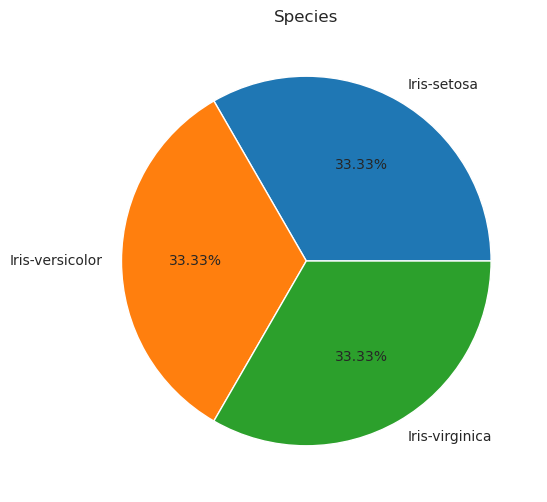

In [109]:
plt.figure(figsize=(17,6))
data['species'].value_counts().plot(kind='pie',autopct='%0.2f%%',ylabel='',title='Species')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

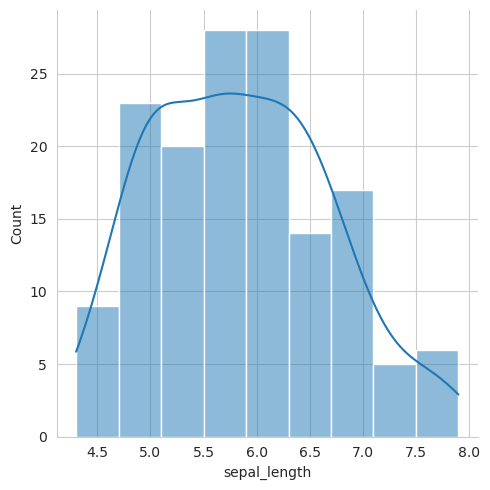

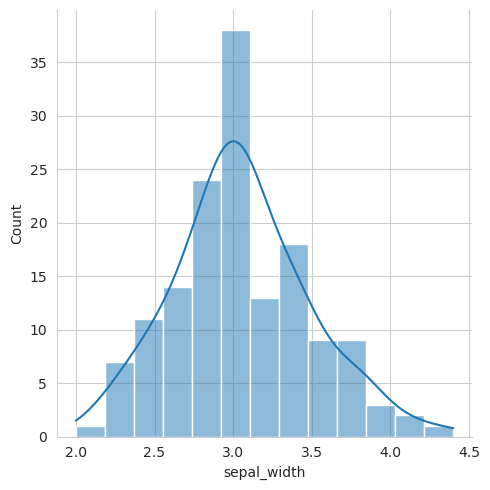

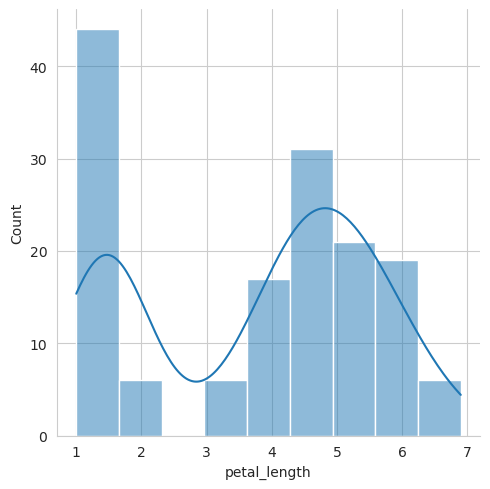

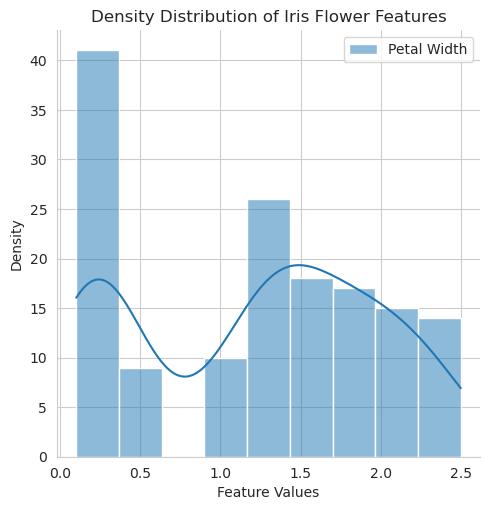

In [111]:
plt.figure(figsize=(10, 6))

sns.displot(data=data, x='sepal_length', label='Sepal Length', kde=True)
sns.displot(data=data, x='sepal_width', label='Sepal Width', kde=True)
sns.displot(data=data, x='petal_length', label='Petal Length', kde=True)
sns.displot(data=data, x='petal_width', label='Petal Width', kde=True)

plt.legend()
plt.title('Density Distribution of Iris Flower Features')
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.show()